In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("C:/Users/cnd21/Downloads/data.csv" ,encoding='cp1252')

C:\Users\cnd21\AppData\Local\Temp\ipykernel_5356\2314296930.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Users/cnd21/Downloads/data.csv" ,encoding='cp1252')


In [6]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [9]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

Data Cleaning

In [10]:
df['so2']=df['so2'].astype('float32')
df['no2']=df['no2'].astype('float32')
df['rspm']=df['spm'].astype('float32')
df['spm']=df['spm'].astype('float32')
df['date']=df['date'].astype('string')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float32
 7   no2                          419509 non-null  float32
 8   rspm                         198355 non-null  float32
 9   spm                          198355 non-null  float32
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  string 
dtyp

In [11]:
df =df.drop_duplicates()

In [12]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149466
type                             5357
so2                             34611
no2                             16201
rspm                           236836
spm                            236836
location_monitoring_station     27303
pm2_5                          425682
date                                7
dtype: int64

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [15]:
percent_missing.sort_values(ascending=False)

pm2_5                          97.858831
rspm                           54.445558
spm                            54.445558
agency                         34.360316
stn_code                       33.121454
so2                             7.956625
location_monitoring_station     6.276609
no2                             3.724402
type                            1.231506
date                            0.001609
sampling_date                   0.000690
location                        0.000690
state                           0.000000
dtype: float64

In [16]:
df =df.drop(['stn_code','agency','location_monitoring_station','pm2_5','sampling_date'],axis =1)

In [17]:
df.head()

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01


In [18]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [19]:
col_var =['state' ,'location','type','date']
col_num =['so2','no2','rspm','spm']

In [20]:
for col in df.columns:
    if df[col].dtype =='object' or df[col].dtype =='string':
        df[col] =df[col].fillna(df[col].mode()[0])
    else:
        df[col] =df[col].fillna(df[col].mean())
    

In [21]:
df.isna().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
date        0
dtype: int64

In [22]:
df

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,220.774826,220.774826,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,220.774826,220.774826,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,220.774826,220.774826,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,220.774826,220.774826,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,220.774826,220.774826,1990-03-01
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.000000,50.000000,220.774826,220.774826,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.000000,46.000000,220.774826,220.774826,2015-12-29
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",10.831111,25.824379,220.774826,220.774826,2015-03-19
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",10.831111,25.824379,220.774826,220.774826,2015-03-19


In [24]:
df.isna().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
date        0
dtype: int64

Data Integration


In [25]:
subset1 =df[['state' ,'location']]
subset2 =df[['state','type']]

In [26]:
subset1.head()

,state,location
0,Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,Hyderabad
3,Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Hyderabad


In [27]:
subset2.head()

,state,type
0,Andhra Pradesh,"Residential, Rural and other Areas"
1,Andhra Pradesh,Industrial Area
2,Andhra Pradesh,"Residential, Rural and other Areas"
3,Andhra Pradesh,"Residential, Rural and other Areas"
4,Andhra Pradesh,Industrial Area


In [28]:
concat_df =pd.concat([subset1,subset2],axis=1)
concat_df

,state,location,state,type
0,Andhra Pradesh,Hyderabad,Andhra Pradesh,"Residential, Rural and other Areas"
1,Andhra Pradesh,Hyderabad,Andhra Pradesh,Industrial Area
2,Andhra Pradesh,Hyderabad,Andhra Pradesh,"Residential, Rural and other Areas"
3,Andhra Pradesh,Hyderabad,Andhra Pradesh,"Residential, Rural and other Areas"
4,Andhra Pradesh,Hyderabad,Andhra Pradesh,Industrial Area
...,...,...,...,...
435737,West Bengal,ULUBERIA,West Bengal,RIRUO
435738,West Bengal,ULUBERIA,West Bengal,RIRUO
435739,andaman-and-nicobar-islands,Guwahati,andaman-and-nicobar-islands,"Residential, Rural and other Areas"
435740,Lakshadweep,Guwahati,Lakshadweep,"Residential, Rural and other Areas"


Error Correcting

In [50]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]


    



In [51]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [52]:
col_name = ['so2', 'no2', 'rspm', 'spm']
for col in col_name:
    df[col] = remove_outliers(df[col])

In [53]:
 import seaborn as sns
import matplotlib.pyplot as plt


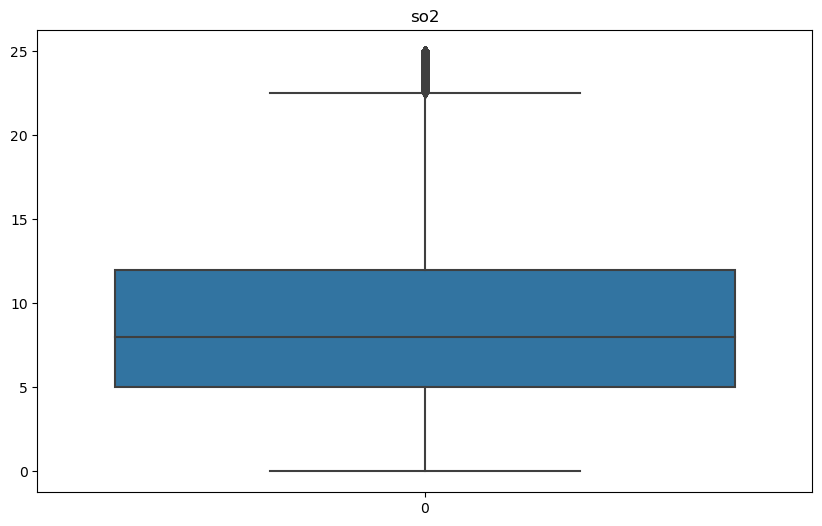

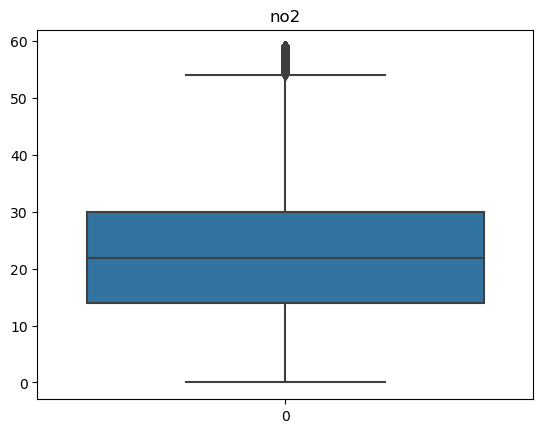

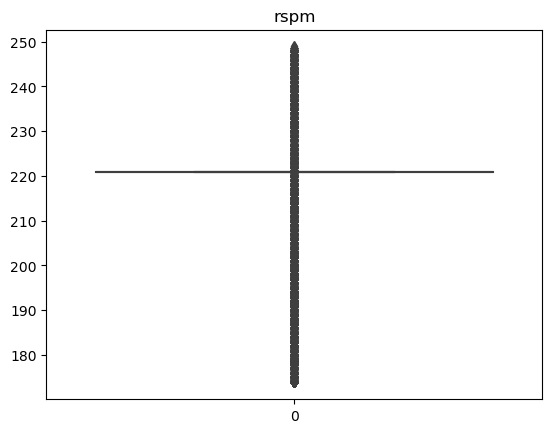

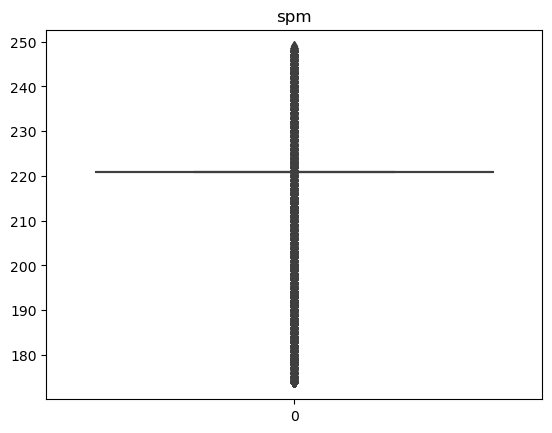

In [54]:
plt.figure(figsize=(10, 6)) 
for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()



Data Transform

In [56]:
from sklearn.preprocessing import LabelEncoder
col_label= ['state','location','type']
# Initialize LabelEncoder
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

In [57]:
df

,state,location,type,so2,no2,rspm,spm,date
0,0,114,6,446,1489,464,464,213
1,0,114,1,197,250,464,464,213
2,0,114,6,790,3096,464,464,213
3,0,114,6,823,1144,464,464,214
4,0,114,1,427,301,464,464,214
...,...,...,...,...,...,...,...,...
435737,35,282,3,2888,5307,464,464,5059
435738,35,282,3,2809,5113,464,464,5064
435739,36,100,6,1638,2696,464,464,4779
435740,17,100,6,1638,2696,464,464,4779
